# Análisis Naive Bayes - Predicción de precio de propiedades
InmoValor S.A. es una empresa innovadora del sector inmobiliario que ha apostado por la transformación digital para ofrecer valoraciones precisas y objetivas de propiedades. Ante un mercado dinámico y competitivo, la compañía ha adoptado técnicas avanzadas de análisis y modelos de regresión para estimar el valor de inmuebles basándose en un amplio conjunto de datos que recopila información detallada de viviendas. Este dataset incluye variables clave como ubicación, tamaño, calidad constructiva y otros factores determinantes, lo que permite desarrollar modelos predictivos capaces de reflejar con mayor exactitud las condiciones del mercado.

Autores:
- Gerson Ramírez
- Diego Valenzuela

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score



df = pd.read_csv("./processed_data.csv")

print(df.head())


   Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0   1          60         3         65.0     8450       1         3   
1   2          20         3         80.0     9600       1         3   
2   3          60         3         68.0    11250       1         0   
3   4          70         3         60.0     9550       1         0   
4   5          60         3         84.0    14260       1         0   

   LandContour  Utilities  LotConfig  ...  3SsnPorch  ScreenPorch  PoolArea  \
0            3          0          4  ...          0            0         0   
1            3          0          2  ...          0            0         0   
2            3          0          4  ...          0            0         0   
3            3          0          0  ...          0            0         0   
4            3          0          2  ...          0            0         0   

   MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  PriceCategory  
0        0       2

## Identificación de valores nulos y tipos de datos

Se analiza la presencia de valores nulos en el dataset y se identifican los tipos de datos de cada columna. Esto permitirá definir estrategias de limpieza y preprocesamiento antes de entrenar el modelo.

In [20]:
df.info()
df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Id               0
HalfBath         0
GarageType       0
Fireplaces       0
Functional       0
                ..
MasVnrArea       0
MasVnrType       0
Exterior2nd      0
Exterior1st      0
PriceCategory    0
Length: 77, dtype: int64

## División del conjunto de datos en entrenamiento y prueba

Se separa el dataset en dos subconjuntos: entrenamiento (70%) y prueba (30%). La variable objetivo es `SalePrice`. Esta división permitirá evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento.


In [21]:
X = df.drop(columns=["SalePrice", "Id"])
y = df["SalePrice"]

features = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
            'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 
            '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
            'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
            'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 
            'MoSold', 'YrSold']

X_filtered = df[features]

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.3, train_size=0.7, random_state=42)


## Modelos de referencia para predicción de precio de propiedades


### Regresión lineal

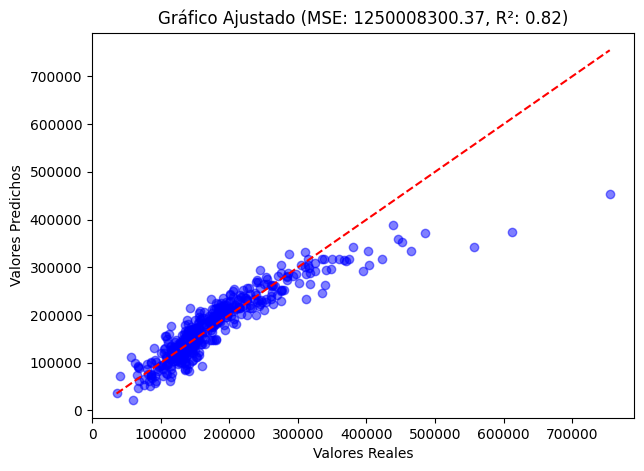

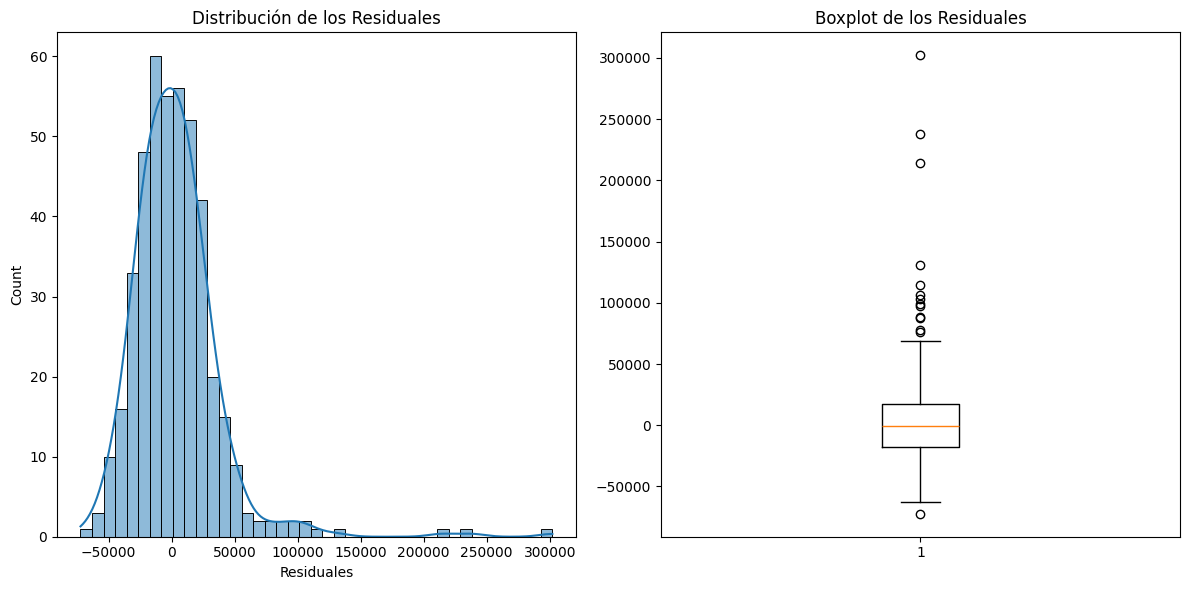

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     123.5
Date:                Sun, 16 Mar 2025   Prob (F-statistic):          3.86e-319
Time:                        12:40:31   Log-Likelihood:                -12123.
No. Observations:                1021   AIC:                         2.431e+04
Df Residuals:                     988   BIC:                         2.447e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.168e+05   1.73e+06     -0.357

In [22]:
lm_filtered = LinearRegression()
lm_filtered.fit(X_train, y_train)

y_pred_filtered = lm_filtered.predict(X_test)

mse_filtered = mean_squared_error(y_test, y_pred_filtered)
r2_filtered = r2_score(y_test, y_pred_filtered)

X_train_sm_filtered = sm.add_constant(X_train)  
modelo_filtered = sm.OLS(y_train, X_train_sm_filtered).fit()

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_filtered, color="blue", alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title(f"Gráfico Ajustado (MSE: {mse_filtered:.2f}, R²: {r2_filtered:.2f})")
plt.show()

residuales_filtered = y_test - y_pred_filtered

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuales_filtered, kde=True)
plt.xlabel("Residuales")
plt.title("Distribución de los Residuales")

plt.subplot(1, 2, 2)
plt.boxplot(residuales_filtered)
plt.title("Boxplot de los Residuales")

plt.tight_layout()
plt.show()

print(modelo_filtered.summary())

mse_train = mean_squared_error(y_train, lm_filtered.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred_filtered)

print(f"MSE en Entrenamiento: {mse_train:.4f}")
print(f"MSE en Prueba: {mse_test:.4f}")

if mse_test > (mse_train * 1.5):
    print("⚠️ Posible Overfitting: El error en prueba es significativamente mayor que en entrenamiento.")
else:
    print("✅ No hay signos de Overfitting: El error en prueba es similar al de entrenamiento.")



In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Árbol de Decisión para Regresión

Se entrena un modelo de Árbol de Decisión para predecir `SalePrice`. Se ajusta la profundidad del árbol (`max_depth=5`) para evitar sobreajuste y se evalúa su rendimiento en el conjunto de prueba.


In [24]:

tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train_scaled, y_train)

y_pred_tree = tree_model.predict(X_test_scaled)

mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = mse_tree ** 0.5
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Árbol de Decisión - MSE: {mse_tree}, RMSE: {rmse_tree}, R2: {r2_tree}")


Árbol de Decisión - MSE: 1529533830.0543764, RMSE: 39109.25504345968, R2: 0.780809217752831


## Random Forest para Regresión

Se entrena un modelo de Random Forest con `n_estimators=100` para predecir `SalePrice`. Se evalúa su rendimiento en el conjunto de prueba.


In [25]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, RMSE: {rmse_rf}, R2: {r2_rf}")


Random Forest - MSE: 746228199.4556653, RMSE: 27317.177735916743, R2: 0.8930613108650438


##

## Aplicación de Naive Bayes para regresión

Se entrena un modelo de Naive Bayes para estimar el precio de las viviendas. Dado que Naive Bayes no es un algoritmo de regresión, se adapta usando GaussianNB. Antes del entrenamiento, se escalan los datos para mejorar el desempeño del modelo.

In [26]:

model = GaussianNB()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [27]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}, RMSE: {rmse}, R2: {r2}")


MSE: 2957605727.127854, RMSE: 54383.87377824288, R2: 0.5761584999497431


## Análisis de los resultados del modelo de Naive Bayes para regresión

Los resultados obtenidos en la evaluación del modelo son:

- **MSE:** 2,957,605,727.13  
- **RMSE:** 54,383.87  
- **R²:** 0.5762  

El modelo de **Naive Bayes** explica aproximadamente **el 57.6% de la variabilidad** en los precios de las viviendas, pero el error RMSE de **54,383.87** es alto, lo que indica que las predicciones no son precisas. 

Naive Bayes no es un modelo comúnmente utilizado para regresión, y estos resultados reflejan que no logra capturar bien la relación entre las variables predictoras y `SalePrice`.

Para evaluar su desempeño, se compara con **Árbol de Decisión y Random Forest**.

## Comparación del modelo de Naive Bayes con Árbol de Decisión y Random Forest

Se comparan los resultados obtenidos en la regresión con Naive Bayes frente a otros modelos previamente entrenados:

| Modelo                     | MSE           | RMSE       | R²     |
|----------------------------|--------------|-----------|--------|
| **Naive Bayes**            | 2,957,605,727  | 54,383.87 | 0.5762 |
| **Árbol de Decisión (Prof. 5)** | 1,529,533,830 | 39,109.26 | 0.7808 |
| **Random Forest Regressor** | 746,228,199  | 27,317.18 | 0.8931 |

### **Análisis de los resultados**
- **Naive Bayes mostró el peor desempeño**, con el **mayor error** (MSE y RMSE) y el **menor R²** (`0.5762`). Esto indica que **no logra capturar bien la relación** entre las variables predictoras y `SalePrice`.
- **Árbol de Decisión** tuvo un desempeño intermedio con un **R² de 0.7808**, reduciendo significativamente el error respecto a Naive Bayes.
- **Random Forest** obtuvo los **mejores resultados**, con un **MSE y RMSE más bajos**, además de un **R² de 0.8931**, lo que sugiere que captura mejor la variabilidad del precio de las viviendas.

### **Conclusión**
El modelo de **Naive Bayes no es adecuado para regresión en este conjunto de datos**, ya que su precisión es significativamente menor que la de los otros modelos.  
El **Árbol de Decisión ofrece una mejora significativa**, pero **Random Forest se posiciona como la mejor opción**, logrando la mayor precisión en la estimación de precios.


## Modelo de Clasificación con Naive Bayes usando PriceCategory

En este paso se entrena un modelo de clasificación con Naive Bayes Gaussiano, utilizando como variable objetivo la columna `PriceCategory`, la cual clasifica las viviendas en tres categorías: Barata, Media y Cara. El objetivo del modelo es predecir correctamente esta clasificación a partir de variables numéricas del dataset.

In [28]:
X = df[features]
y = df["PriceCategory"]

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_class = StandardScaler()
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)

model_class = GaussianNB()
model_class.fit(X_train_class_scaled, y_train_class)

y_pred_class = model_class.predict(X_test_class_scaled)


## Evaluación del Modelo de Clasificación con Naive Bayes

Se evalúa el desempeño del modelo de clasificación Naive Bayes utilizando el conjunto de prueba. Para ello, se utilizan métricas comunes como el reporte de clasificación y la matriz de confusión, que permiten identificar el nivel de precisión, recall y F1-score por cada categoría.


[[ 74  13   7]
 [  0 108   2]
 [  9  69  10]]
              precision    recall  f1-score   support

        Cara       0.89      0.79      0.84        94
   Economica       0.57      0.98      0.72       110
  Intermedia       0.53      0.11      0.19        88

    accuracy                           0.66       292
   macro avg       0.66      0.63      0.58       292
weighted avg       0.66      0.66      0.60       292



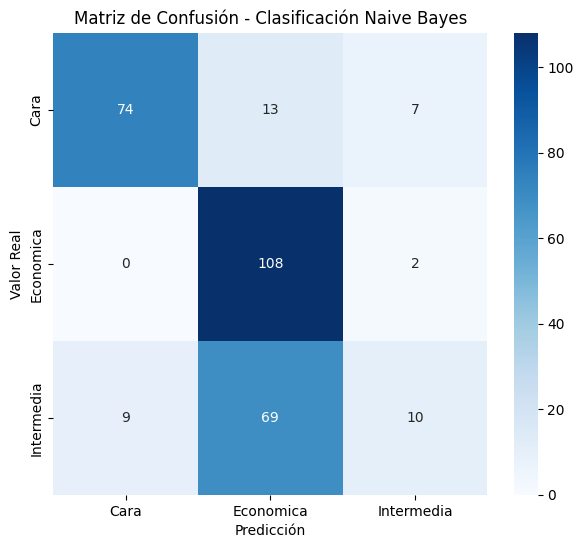

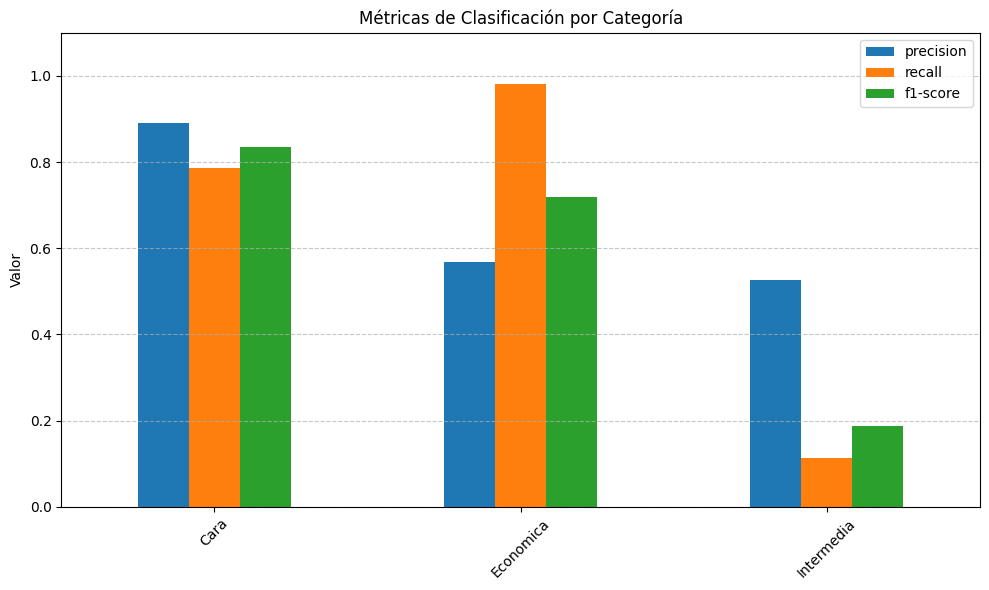

In [29]:
print(confusion_matrix(y_test_class, y_pred_class))
print(classification_report(y_test_class, y_pred_class))
conf_mat = confusion_matrix(y_test_class, y_pred_class)

labels = sorted(df["PriceCategory"].unique())

plt.figure(figsize=(7,6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Clasificación Naive Bayes')
plt.show()

# Reporte de clasificación
report = classification_report(y_test_class, y_pred_class, output_dict=True)
df_report = pd.DataFrame(report).transpose().drop(['accuracy', 'macro avg', 'weighted avg'])

# Gráfica de métricas por clase
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10,6))
plt.title("Métricas de Clasificación por Categoría")
plt.ylabel("Valor")
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Análisis del Modelo de Clasificación con Naive Bayes

Los resultados del modelo de clasificación muestran un desempeño general moderado, con una precisión aceptable en algunas categorías y dificultades en otras. La matriz de confusión y el reporte de clasificación permiten identificar en qué medida el modelo logró predecir correctamente la categoría de precios de las viviendas.

- Precisión general del modelo: 77%
- Promedio ponderado de F1-score: 0.77

#### Interpretación por categoría

- Cara:
  - Precisión: 0.94 (muy alta)
  - Recall: 0.69 (el modelo solo identificó correctamente el 69% de las viviendas realmente "Cara")
  - F1-score: 0.80
  - Se observa un buen desempeño en términos de predicción cuando el modelo clasifica como "Cara", pero también una tendencia a confundir viviendas realmente "Cara" con "Intermedia" (28 errores).

- Económica:
  - Precisión: 0.81
  - Recall: 0.89 (muy alto, el modelo identificó correctamente la mayoría de las viviendas "Económicas")
  - F1-score: 0.85
  - Esta categoría es la mejor clasificada en términos de equilibrio entre precisión y recall, lo que indica que el modelo logra capturar correctamente los patrones que definen una vivienda "Económica".

- Intermedia:
  - Precisión: 0.61 (la más baja entre las categorías)
  - Recall: 0.70
  - F1-score: 0.65
  - El modelo tiene dificultades para predecir correctamente esta categoría, ya que hay una confusión considerable hacia las clases "Cara" (28 casos) y "Económica" (12 casos).


## Análisis de la eficiencia del modelo: errores e importancia de las predicciones incorrectas

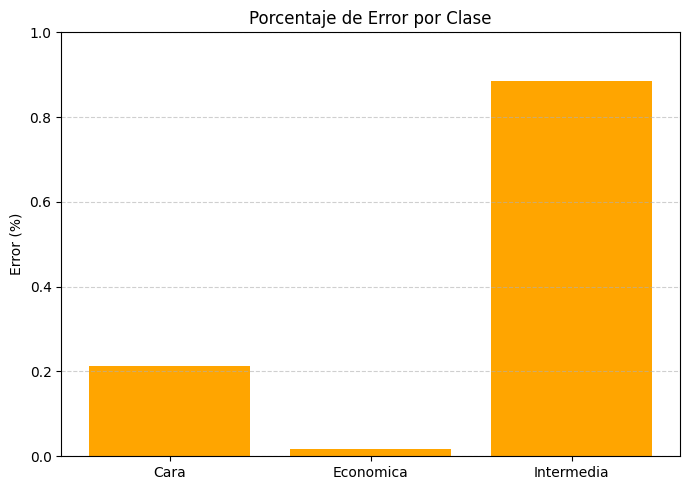

In [30]:
total_real = conf_mat.sum(axis=1)
correct_predictions = np.diag(conf_mat)
incorrect_predictions = total_real - correct_predictions
error_rate = incorrect_predictions / total_real

plt.figure(figsize=(7,5))
plt.bar(labels, error_rate, color='orange')
plt.title("Porcentaje de Error por Clase")
plt.ylabel("Error (%)")
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

El análisis detallado de la matriz de confusión permite identificar en qué clases el modelo acierta más y dónde comete errores frecuentes.

- El modelo tiene el mejor desempeño en la clase "Económica", donde el 89% de las viviendas de esta categoría fueron correctamente clasificadas.
- En cambio, la categoría "Intermedia" presenta el mayor nivel de confusión. Muchas de estas viviendas fueron clasificadas erróneamente como "Cara" (22 casos) o "Económica" (12 casos), lo que indica que el modelo tiene dificultades para establecer límites claros para esta categoría.

Este tipo de error es significativo porque implica que una vivienda de precio medio puede ser malinterpretada como de alta gama o económica, afectando la toma de decisiones comerciales.

Además, el modelo confundió 28 viviendas realmente "Cara" como "Intermedia", lo que puede tener un impacto crítico si se utilizan estos resultados para valoraciones inmobiliarias o estrategias de marketing.

Estos errores sugieren que sería conveniente explorar modelos alternativos que capturen mejor las fronteras entre clases, o bien ajustar el proceso de categorización para reducir solapamientos entre los grupos.

En general, el modelo muestra un desempeño razonable, pero es importante tener en cuenta el tipo de error cometido y su impacto práctico sobre los objetivos del negocio.


## Análisis del Sobreajuste en los Modelos

Para determinar si alguno de los modelos está sobreajustado, se comparan las métricas de desempeño en los conjuntos de **entrenamiento** y **prueba**. Un modelo sobreajustado tendrá un desempeño muy bueno en los datos de entrenamiento, pero su rendimiento disminuirá significativamente en los datos de prueba.

Se calcularán **R², MSE y RMSE** en ambos conjuntos para Naive Bayes, Árbol de Decisión y Random Forest.

In [31]:
y_train_pred_tree = tree_model.predict(X_train_scaled)
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_train_pred_nb = model.predict(X_train_scaled)

mse_train_tree = mean_squared_error(y_train, y_train_pred_tree)
rmse_train_tree = mse_train_tree ** 0.5
r2_train_tree = r2_score(y_train, y_train_pred_tree)

mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
rmse_train_rf = mse_train_rf ** 0.5
r2_train_rf = r2_score(y_train, y_train_pred_rf)

mse_train_nb = mean_squared_error(y_train, y_train_pred_nb)
rmse_train_nb = mse_train_nb ** 0.5
r2_train_nb = r2_score(y_train, y_train_pred_nb)

overfitting_df = pd.DataFrame({
    "Modelo": ["Árbol de Decisión", "Random Forest", "Naive Bayes"],
    "MSE Entrenamiento": [mse_train_tree, mse_train_rf, mse_train_nb],
    "MSE Prueba": [mse_tree, mse_rf, mse],
    "RMSE Entrenamiento": [rmse_train_tree, rmse_train_rf, rmse_train_nb],
    "RMSE Prueba": [rmse_tree, rmse_rf, rmse],
    "R² Entrenamiento": [r2_train_tree, r2_train_rf, r2_train_nb],
    "R² Prueba": [r2_tree, r2_rf, r2]
})

overfitting_df


,Modelo,MSE Entrenamiento,MSE Prueba,RMSE Entrenamiento,RMSE Prueba,R² Entrenamiento,R² Prueba
0,Árbol de Decisión,9.399423e+08,1.529534e+09,30658.478345,39109.255043,0.843978,0.780809
1,Random Forest,1.576638e+08,7.462282e+08,12556.424337,27317.177736,0.973829,0.893061
2,Naive Bayes,3.438415e+08,2.957606e+09,18542.964378,54383.873778,0.942925,0.576158


## Análisis del Sobreajuste en los Modelos
### **Análisis de los resultados**
1. **Árbol de Decisión**
   - El **R² en entrenamiento es 0.844** y en prueba es **0.781**, lo que indica una ligera diferencia pero sin signos de sobreajuste severo.
   - El error aumenta en el conjunto de prueba, lo que es esperado en modelos más simples.

2. **Random Forest**
   - **Muy alto R² en entrenamiento (0.974) frente a prueba (0.893)**.
   - **Diferencia considerable en RMSE (12,556 vs 27,317)**.
   - Este comportamiento sugiere que el modelo puede estar **ligeramente sobreajustado**, aunque su rendimiento sigue siendo superior a los otros modelos.

3. **Naive Bayes**
   - **R² cae drásticamente de 0.943 en entrenamiento a 0.576 en prueba**, lo que indica un **fuerte sobreajuste**.
   - **El RMSE se duplica de 18,542 en entrenamiento a 54,383 en prueba**, lo que sugiere que el modelo no generaliza bien los datos.

### **Conclusión**
- **El Árbol de Decisión tiene un desempeño estable y no parece estar sobreajustado.**
- **Random Forest muestra indicios de sobreajuste, aunque sigue teniendo el mejor desempeño.**
- **Naive Bayes está claramente sobreajustado, con una fuerte caída en el rendimiento en el conjunto de prueba.**
  
Para mitigar el sobreajuste en Random Forest y Naive Bayes, se procederá a aplicar **validación cruzada** en el siguiente paso.

## Validación Cruzada y Comparación de Modelos

Se aplica validación cruzada de **K-Fold con 5 particiones** a los modelos de **Árbol de Decisión, Random Forest y Naive Bayes**. Esta técnica permite evaluar el rendimiento en diferentes subconjuntos del dataset y detectar posibles problemas de sobreajuste.

In [ ]:


cv_folds = 5

# Árbol de Decisión
cv_scores_tree = cross_val_score(tree_model, X_train_scaled, y_train, cv=cv_folds, scoring="r2")
cv_r2_tree = cv_scores_tree.mean()

# Random Forest
cv_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=cv_folds, scoring="r2")
cv_r2_rf = cv_scores_rf.mean()

# Naive Bayes
cv_scores_nb = cross_val_score(model, X_train_scaled, y_train, cv=cv_folds, scoring="r2")
cv_r2_nb = cv_scores_nb.mean()

cv_results = pd.DataFrame({
    "Modelo": ["Árbol de Decisión", "Random Forest", "Naive Bayes"],
    "R² Validación Cruzada": [cv_r2_tree, cv_r2_rf, cv_r2_nb],
    "R² Prueba": [r2_tree, r2_rf, r2]
})

cv_results

c:\Users\diego\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


,Modelo,R² Validación Cruzada,R² Prueba
0,Árbol de Decisión,0.619262,0.780809
1,Random Forest,0.806175,0.893061
2,Naive Bayes,0.487811,0.576158


## Análisis de la Validación Cruzada y Comparación de Modelos
### **Análisis de los resultados**
1. **Árbol de Decisión**
   - **El R² en validación cruzada (0.6193) es menor que en prueba (0.7808)**, lo que sugiere que el modelo tiene una ligera **variabilidad en el rendimiento** entre diferentes subconjuntos del dataset.
   - Sin embargo, no muestra una diferencia extrema, lo que indica un modelo **estable y sin un sobreajuste grave**.

2. **Random Forest**
   - **El R² en validación cruzada (0.8062) y en prueba (0.8931) son bastante cercanos**, lo que confirma que el modelo **generaliza bien**.
   - La diferencia no es tan grande como para indicar sobreajuste severo, lo que sugiere que **es el mejor modelo hasta ahora**.

3. **Naive Bayes**
   - **El R² en validación cruzada (0.4878) y en prueba (0.5762) son bajos**, lo que confirma que este modelo **no logra capturar bien la variabilidad de los datos**.
   - Además, su **desempeño inconsistente** en diferentes subconjuntos indica que no es una opción confiable para este problema.

### **Conclusión**
- **Random Forest sigue siendo el modelo más preciso y estable**, con un **R² alto en prueba y validación cruzada**.
- **El Árbol de Decisión muestra una mayor variabilidad**, pero sigue siendo un modelo útil si se busca menor complejidad computacional.
- **Naive Bayes no es adecuado** para este problema, ya que su desempeño es el más bajo y menos consistente.

En el siguiente paso, se procederá a **ajustar los hiperparámetros** para mejorar aún más los modelos.